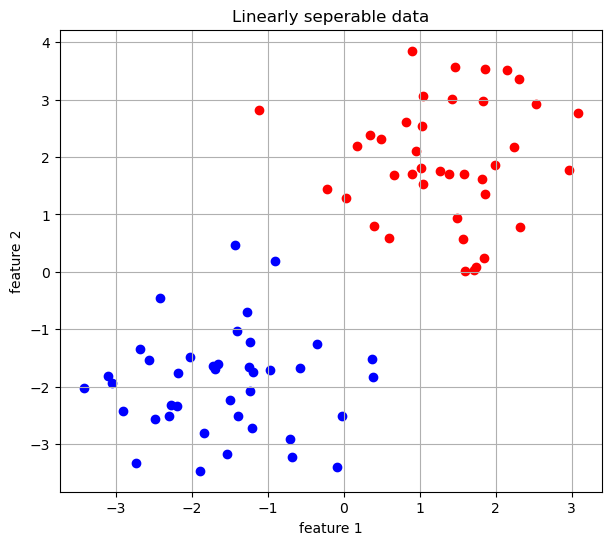

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def generate_data():
    np.random.seed(42)
    X_pos = np.random.randn(40,2)+[1.5,2]
    y_pos = np.ones(40)

    X_neg = np.random.randn(40,2)+[-1.5,-2]
    y_neg = -1*np.ones(40)

    X = np.vstack((X_pos,X_neg))
    y = np.hstack((y_pos,y_neg))

    return X,y

def plot(X,y):
    plt.figure(figsize=(7,6))
    for i in range(len(y)):
        color = 'r' if y[i]==1 else 'b'
        plt.scatter(X[i][0],X[i][1],color=color)
    plt.title("Linearly seperable data")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.grid(True)
    plt.show()

X,y = generate_data()
plot(X,y)

Epoch 0: ||w||² = 0.0374
Epoch 100: ||w||² = 1.3307
Epoch 200: ||w||² = 1.7454
Epoch 300: ||w||² = 1.9980
Epoch 400: ||w||² = 2.2292
Epoch 500: ||w||² = 2.2292
Epoch 600: ||w||² = 2.2292
Epoch 700: ||w||² = 2.2292
Epoch 800: ||w||² = 2.2292
Epoch 900: ||w||² = 2.2292


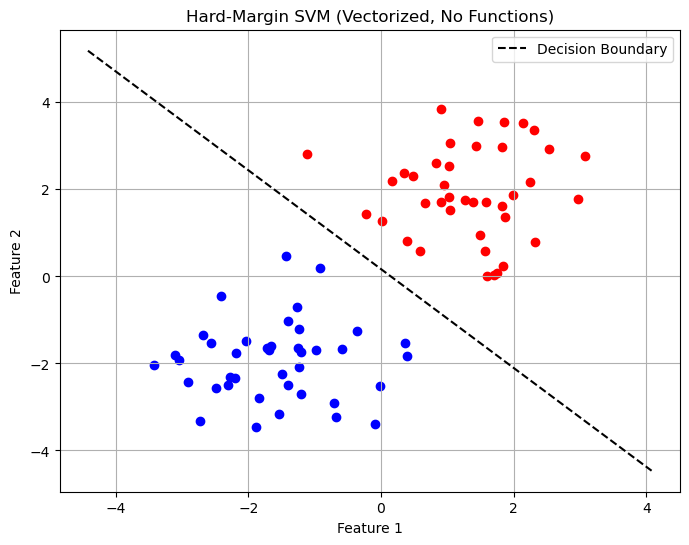

In [22]:
m = X.shape[0]
w = np.zeros(X.shape[1])
b = 0
lr = 0.001
epochs = 1000
for epoch in range(epochs):
    y_pred = y*(X@w.T+b)
    voilet = y_pred<1
    x_v = X[voilet]
    y_v = y[voilet]
    if len(y_v)>0:
        dw = np.sum(y_v[:, np.newaxis] * x_v, axis=0)
        db = np.sum(y_v)
        w += lr*dw
        b += lr*db
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: ||w||² = {np.dot(w, w):.4f}")


plt.figure(figsize=(8, 6))
for i in range(len(y)):
    color = 'r' if y[i] == 1 else 'b'
    plt.scatter(X[i][0], X[i][1], color=color)

x_vals = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.title("Hard-Margin SVM (Vectorized, No Functions)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()